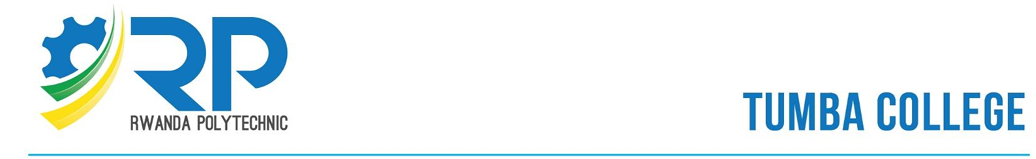

In [8]:
# Import library for data science
import pandas as pd
# Load loan default dataset
import numpy as np

In [9]:
# Load dataset
df=pd.read_csv('datasets - datasets.csv')
df

,CropType,CropDays,SoilMoisture,temperature,Humidity,Irrigation
0,Wheat,10,400,30,15,0
1,Wheat,7,200,30,32,0
2,Wheat,9,300,21,28,0
3,Wheat,3,500,40,22,0
4,Wheat,2,700,23,34,0
...,...,...,...,...,...,...
496,Coffee,93,675,25,19,1
497,Coffee,95,210,23,17,0
498,Coffee,97,398,25,18,0
499,Coffee,99,678,24,18,1


In [10]:
# Check missing values
df.isnull().sum()

CropType        0
CropDays        0
SoilMoisture    0
temperature     0
Humidity        0
Irrigation      0
dtype: int64

In [11]:
# Check for duplicate rows in the dataset
df.duplicated().sum()

0

### data Processing

In [12]:
# Convert CropType to categorical and encode to numerical values
df['CropType']=df['CropType'].astype('category')
df['CropType']=df['CropType'].cat.codes 
df

,CropType,CropDays,SoilMoisture,temperature,Humidity,Irrigation
0,8,10,400,30,15,0
1,8,7,200,30,32,0
2,8,9,300,21,28,0
3,8,3,500,40,22,0
4,8,2,700,23,34,0
...,...,...,...,...,...,...
496,0,93,675,25,19,1
497,0,95,210,23,17,0
498,0,97,398,25,18,0
499,0,99,678,24,18,1


### data visaulization

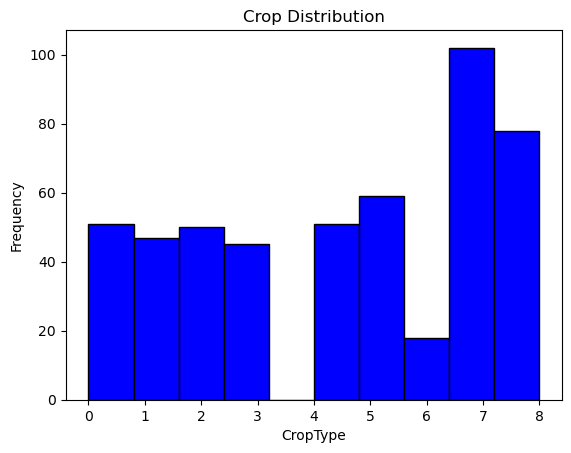

In [13]:
# Import matplotlib first
import matplotlib.pyplot as plt

# Now the histogram will work
plt.hist(df['CropType'], color='blue', edgecolor='black')
plt.xlabel('CropType')
plt.ylabel('Frequency')
plt.title('Crop Distribution')
plt.show()

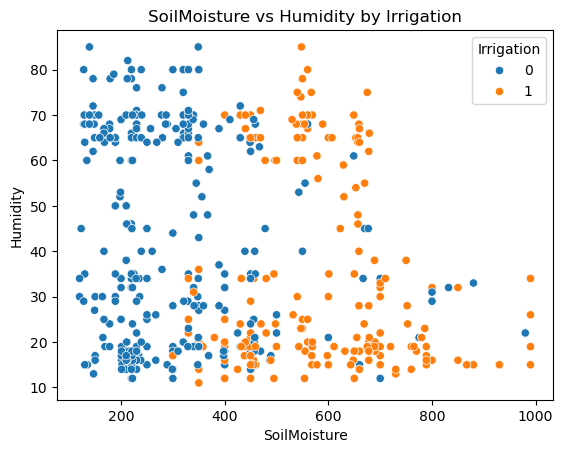

In [14]:
import seaborn as sns

sns.scatterplot(data=df, x='SoilMoisture', y='Humidity', hue='Irrigation')
plt.title('SoilMoisture vs Humidity by Irrigation')
plt.show()

<Axes: >

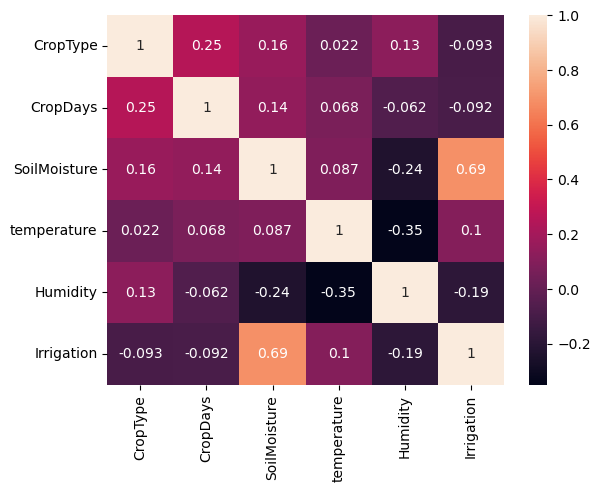

In [15]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix
sns.heatmap(corr_matrix, annot=True)

### Split the data

In [19]:
# Define features (X) and target (y)

x=df[['CropType','CropDays','SoilMoisture','temperature','Humidity']]
y=df['Irrigation']

In [20]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Building model

In [21]:
# Initialize the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)  # Train the model on training data

RandomForestClassifier()

In [22]:
df.tail(3)

,CropType,CropDays,SoilMoisture,temperature,Humidity,Irrigation
498,0,97,398,25,18,0
499,0,99,678,24,18,1
500,0,101,201,21,14,0


In [23]:
import warnings
warnings.filterwarnings('ignore')

### Model Evaluation

In [24]:
# Define input data for prediction - feature values in same order as training
input_data=[[0,	99,	678, 24, 18	]]
prediction= model.predict(input_data) # Use trained model to make prediction on new input data
prediction

array([1], dtype=int64)

In [25]:
Irrigation_system = pd.DataFrame([{
    'CropType': 0,
    'CropDays': 99,
    'SoilMoisture': 678,
    'temperature': 24,
    'Humidity': 18,
}])

# Reorder columns to match training data
Irrigation_system = Irrigation_system[x_train.columns]

# Now predict and store the prediction in a different variable
prediction = model.predict(Irrigation_system)
print("Predicted Irrigation:", prediction[0]) 

Predicted Irrigation: 1


In [26]:
y_pred = model.predict(x_test)

### Check Accuracy

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MAE: 0.0297029702970297
MSE: 0.0297029702970297
R2: 0.8705128205128205


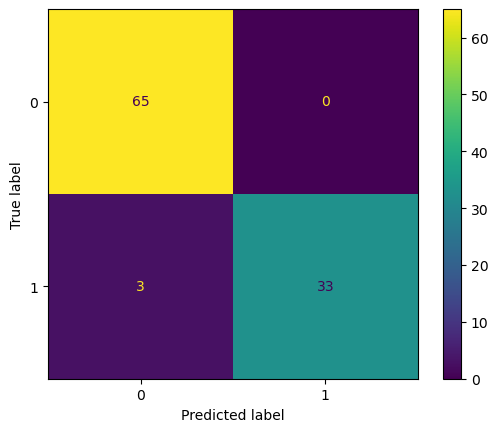

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [30]:
import pickle
with open('Irrigation.pkl','wb') as f:
    pickle.dump(model, f)
print('Model saved')

Model saved
